In [4]:
#기본 세팅
import pandas as pd #score 파일 불러오기 위한 패키지
import matplotlib.pyplot as plt
import matplotlib as mal

#한글설정
plt.rc('font',family='Malgun Gothic') #글꼴은 변경 가능
#사이즈값 설정
plt.rc('font',size=10) #각 축 값 글자 크기 지정(x,y축 값)
#한글깨지 방지
plt.rc('axes',unicode_minus=False) #xy축 -축의 한글 깨짐 방지(영문 사용 시 필요 없음)

In [5]:
#파일 가져오기
df=pd.read_csv('data/score.csv',index_col='지원번호')
df # x축 이름, y축 key(지원번호)



,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


In [6]:
df.loc['3번','학교']='산북고'
df.loc['7번','학교']='남능고'
df #학교가 4개가 됨(수정)

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


In [7]:
#학교별 평균
group=df.groupby('학교')['키'].mean()
group.to_frame('키평균')
#학교 명만 가지고 오기
school=group.index # group의 학교(행)만 가지고 옴
height=group.values #group의 키(열)만 가지고 옴
school, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([189.33333333, 196.        , 189.        , 184.5       ]))

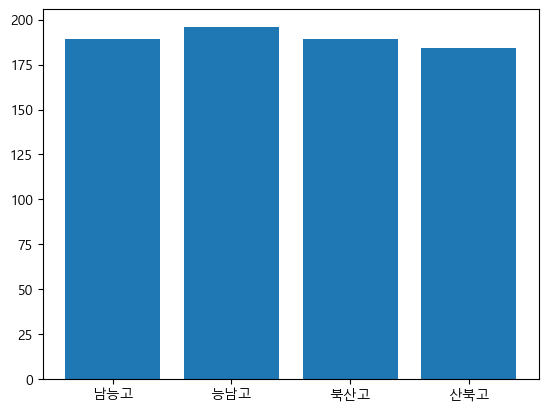

NameError: name 's' is not defined

Error in callback <function _draw_all_if_interactive at 0x000002228E112DD0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '남능고'

ConversionError: Failed to convert value(s) to axis units: '남능고'

<Figure size 640x480 with 1 Axes>

In [8]:
plt.bar(school, height)
plt.show() #학교별 평균 키

#바 위 데이터레이블 표기
for idx, h in enumerate(height):
    plt.text(school[idx], height[idx]+1, f'{h:2f}cm', ha='center')
    plt.xticks(school, [s+'등학교',])

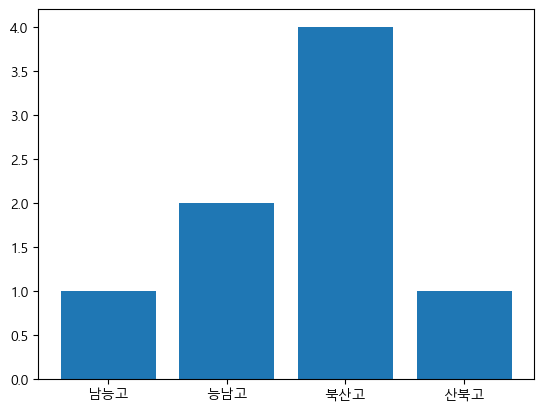

Error in callback <function _draw_all_if_interactive at 0x000002342280E5F0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '남능고'

ConversionError: Failed to convert value(s) to axis units: '남능고'

<Figure size 640x480 with 1 Axes>

In [ ]:
#학교별 인원수 학생수 출력
group2=df.groupby('학교').size() #명 수 구할 떄
school2=group2.index
mem=group2.values
plt.bar(school2, mem)
plt.show()
for idx, m in enumerate(mem):
    plt.text(school2[idx], mem[idx]+1, m, size=5,ha='center')

In [ ]:

df['SW특기'].str.capitalize() #df특기의 문자의 첫 글자를 대문자로 바꿔줌(.capitalize())
df.fillna(['SW특기':'없음'],inplace=True)
sw_df=df.groupby('SW특기')['이름'].size()
sw_df

SyntaxError: invalid syntax (2907378150.py, line 2)

In [ ]:
sw=sw_df.index
count=sw_df.values
sw, count

(Index(['C', 'C#', 'Java', 'Javascript', 'Python'], dtype='object', name='SW특기'),
 array([1, 1, 1, 1, 2]))

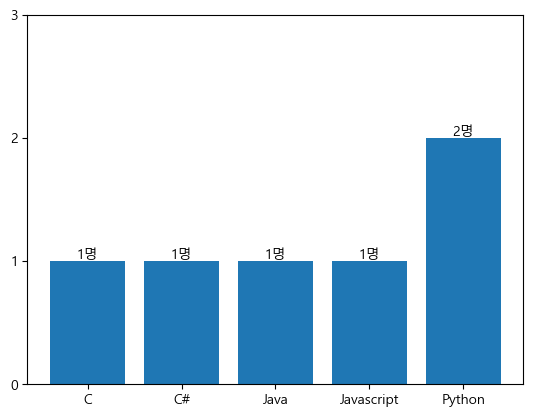

In [ ]:
plt.bar(sw, count)
for idx, c in enumerate(count):
    plt.text(idx, c+0.02, f'{c}명',ha='center')
plt.ylim(0,max(count)+1) #최대값
plt.yticks([y for y in range(0, max(count)+2, 1)]) #y값 증가 단위
plt.show()


In [ ]:
#학교별 평균 점수(먼저 개인별 평균이 필요함)
df2=df.copy()
df2['평균']=df2.apply(lambda row: row['국어':'사회'].mean(), axis=1)
group3=df2.groupby('학교')['평균'].mean()
group3
sch=group3.index
avg=group3.values
sch, avg


(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([48.  , 90.5 , 53.75, 76.  ]))

Text(0, 0.5, '평균점수')

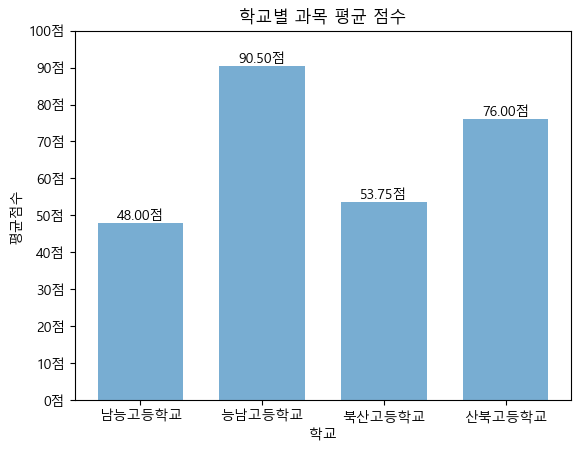

In [ ]:
plt.bar(sch, avg,alpha=0.6, width=0.7)
plt.title('학교별 과목 평균 점수')
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}점', ha='center')
plt.ylim(0,100)
ysticks=[y for y in range(0,101,10)]
plt.yticks(ysticks,[f'{y}점' for y in ysticks])
plt.xticks(school, [s+'등학교' for s in school])
plt.xlabel('학교')
plt.ylabel('평균점수')

In [ ]:
#______________________________________프로젝트

In [ ]:
#기본 세팅
import pandas as pd #score 파일 불러오기 위한 패키지
import matplotlib.pyplot as plt
import matplotlib as mal

#한글설정
plt.rc('font',family='Malgun Gothic') #글꼴은 변경 가능
#사이즈값 설정
plt.rc('font',size=10) #각 축 값 글자 크기 지정(x,y축 값)
#한글깨지 방지
plt.rc('axes',unicode_minus=False) #xy축 -축의 한글 깨짐 방지(영문 사용 시 필요 없음)

#파일 가져오기
df=pd.read_csv('data/score.csv',index_col='지원번호')


,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


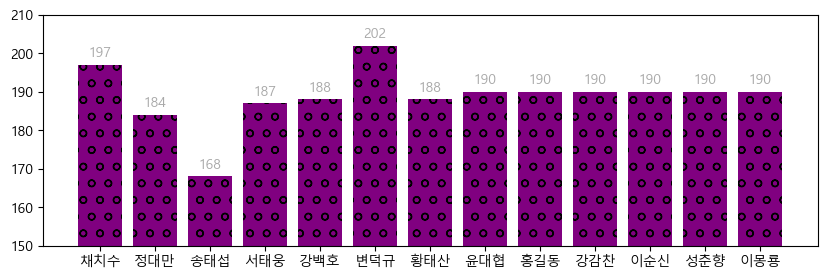

In [ ]:
name=df['이름']
height=df['키']
plt.figure(figsize=(10,3))
plt.bar(name, height, color='purple',hatch='o')
plt.xticks
plt.ylim(150,210)
for idx, h in enumerate(height):
    plt.text(idx, h+2, h, color='darkgray',ha='center')


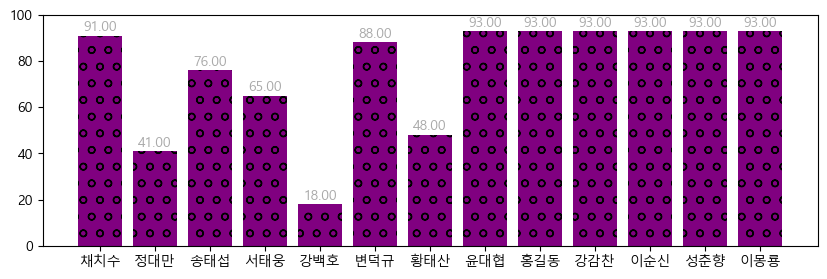

In [25]:
df['평균']=df.apply(lambda row:row['국어':'사회'].mean(),axis=1)
name=df['이름']
avg=df['평균']
plt.figure(figsize=(10,3))
plt.bar(name, avg, color='purple',hatch='o')
plt.xticks
plt.ylim(0,100)
for idx, h in enumerate(avg):
    plt.text(idx, h+2, f'{h:.2f}', color='darkgray',ha='center')

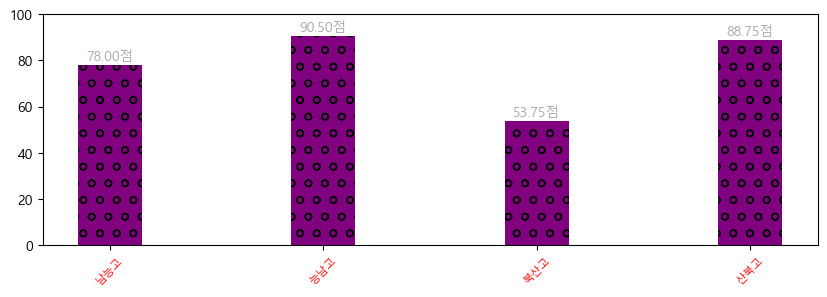

In [24]:
df['평균']=df.apply(lambda row:row['국어':'사회'].mean(),axis=1)
group=df.groupby('학교')['평균'].mean()
sch=group.index
avg=group.values
plt.figure(figsize=(10,3))
plt.bar(sch, avg, color='purple',hatch='o', width=0.3)
plt.xticks(rotation=45, size=8, color='red')
plt.ylim(0,100)
for idx, h in enumerate(avg):
    plt.text(idx, h+2, f'{h:.2f}점', color='darkgray',ha='center')

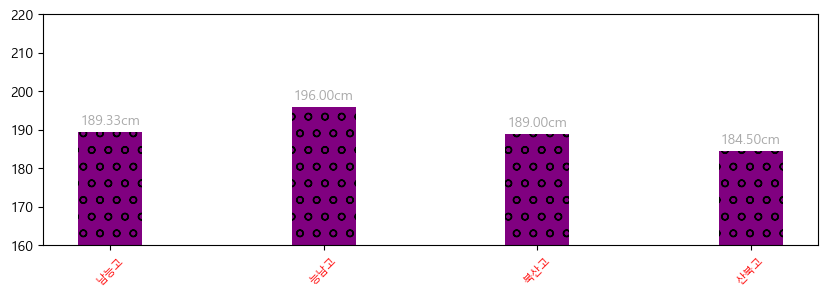

In [23]:
group=df.groupby('학교')['키'].mean()
sch=group.index
height=group.values
plt.figure(figsize=(10,3))
plt.bar(sch, height, color='purple',hatch='o', width=0.3)
plt.xticks(rotation=45, size=8, color='red')
plt.ylim(160,220)
for idx, h in enumerate(height):
    plt.text(idx, h+2, f'{h:.2f}cm', color='darkgray',ha='center')

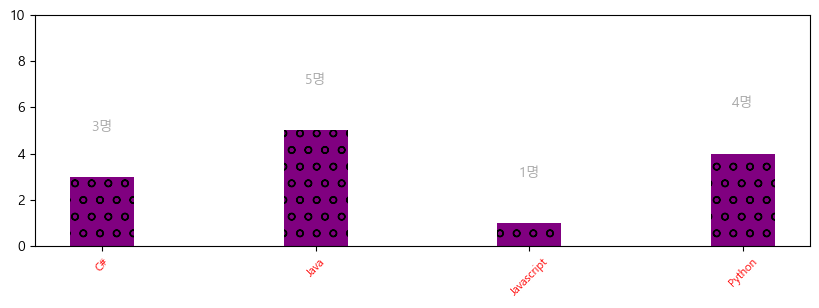

In [22]:
#sw특기 인원 수
df['SW특기']=df['SW특기'].str.capitalize()
group=df.groupby('SW특기').size()
sw=group.index
peo=group.values
plt.figure(figsize=(10,3))
plt.bar(sw, peo, color='purple',hatch='o', width=0.3)
plt.xticks(rotation=45, size=8, color='red')
plt.ylim(0,10)
for idx, h in enumerate(peo):
    plt.text(idx, h+2, f'{h}명', color='darkgray',ha='center')